In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

In [2]:
df = pd.read_csv(r"C:\Users\moaz\Downloads\datasets\laptop_price.csv",encoding='latin-1')
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [3]:
df.isnull().sum()

#There are no missing values in the data

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

C:\Users\moaz\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price_euros', ylabel='Density'>

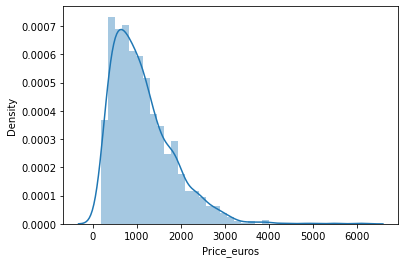

In [4]:
#graph on the range of prices of the laptops
sns.distplot(df['Price_euros'])

<AxesSubplot:>

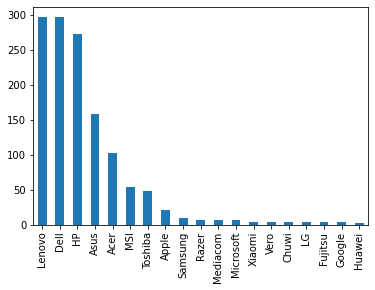

In [5]:
#graph between companies names and the number of the laptops of these companies in the data
df['Company'].value_counts().plot(kind='bar')

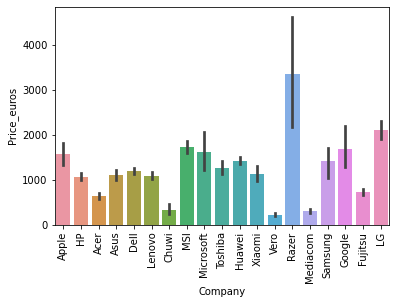

In [6]:
#graph to show the prices of the companies laptops
sns.barplot(x=df['Company'],y=df['Price_euros'])
plt.xticks(rotation='vertical')
plt.show()

<AxesSubplot:>

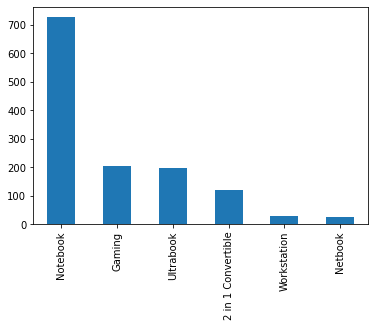

In [7]:
# graph to show the number of different types of laptops in the data
df['TypeName'].value_counts().plot(kind='bar')

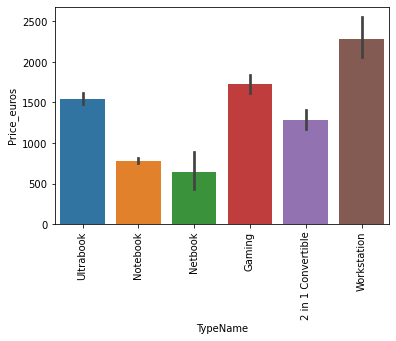

In [8]:
# graph between the types of laptops and their prices in euors
sns.barplot(x=df['TypeName'],y=df['Price_euros'])
plt.xticks(rotation='vertical')
plt.show()

C:\Users\moaz\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Inches', ylabel='Density'>

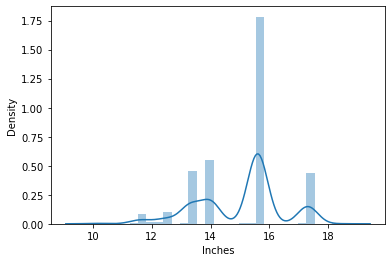

In [9]:
# graph shows the range of the difrrent inches (size) of the laptops
sns.distplot(df['Inches'])

<AxesSubplot:xlabel='Inches', ylabel='Price_euros'>

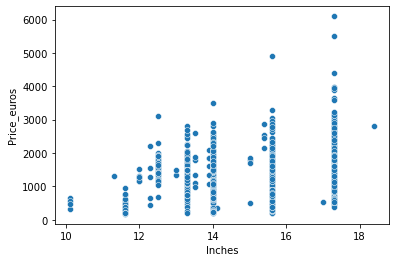

In [10]:
# graph shows the different prices of diffent sizes of laptops(inches) in euros
sns.scatterplot(x=df['Inches'],y=df['Price_euros'])

In [11]:
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
IPS Panel 1366x768                                 7
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel Retina Display 2560x1600                 6
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [12]:
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

<AxesSubplot:>

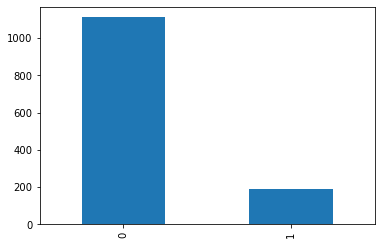

In [13]:
# the bar shows the ratio of touch screens to all the screens
df['Touchscreen'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Touchscreen', ylabel='Price_euros'>

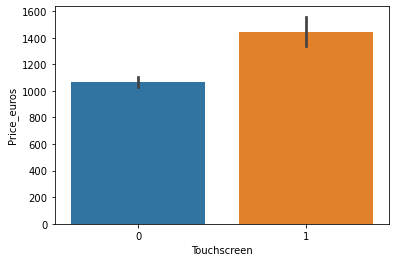

In [14]:
#  this bar shows that tocuch screens is more expensive than normal screens
sns.barplot(x=df['Touchscreen'],y=df['Price_euros'])

In [15]:
df['Ips'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

<AxesSubplot:>

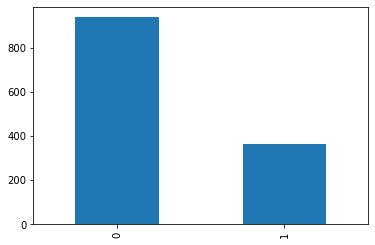

In [16]:
df['Ips'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Ips', ylabel='Price_euros'>

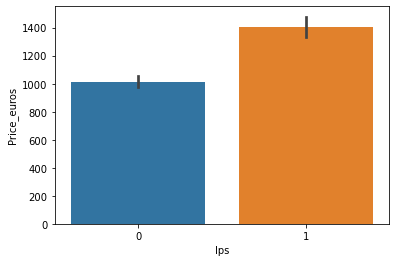

In [17]:
sns.barplot(x=df['Ips'],y=df['Price_euros'])

In [18]:
new = df['ScreenResolution'].str.split('x',n=1,expand=True)

In [19]:
new

,0,1
0,IPS Panel Retina Display 2560,1600
1,1440,900
2,Full HD 1920,1080
3,IPS Panel Retina Display 2880,1800
4,IPS Panel Retina Display 2560,1600
...,...,...
1298,IPS Panel Full HD / Touchscreen 1920,1080
1299,IPS Panel Quad HD+ / Touchscreen 3200,1800
1300,1366,768
1301,1366,768


In [20]:
df['X_res'] = new[0]
df['Y_res'] = new[1]

In [21]:
df['X_res'] = df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [22]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,Ips,X_res,Y_res
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,0,1,2560,1600
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,0,0,1440,900
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,0,0,1920,1080
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,0,1,2880,1800
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,0,1,2560,1600


In [23]:
df['X_res'] = df['X_res'].astype('int')
df['Y_res'] = df['Y_res'].astype('int')

In [24]:
df.corr()['Price_euros']

laptop_ID      0.067830
Inches         0.068197
Price_euros    1.000000
Touchscreen    0.191226
Ips            0.252208
X_res          0.556529
Y_res          0.552809
Name: Price_euros, dtype: float64

In [25]:
df['ppi'] = (((df['X_res']**2) + (df['Y_res']**2))**0.5/df['Inches']).astype('float')

In [26]:
df.corr()['Price_euros']

laptop_ID      0.067830
Inches         0.068197
Price_euros    1.000000
Touchscreen    0.191226
Ips            0.252208
X_res          0.556529
Y_res          0.552809
ppi            0.473487
Name: Price_euros, dtype: float64

In [27]:
df.drop(columns=['ScreenResolution','laptop_ID','Inches','X_res','Y_res'],inplace=True)

In [28]:
df['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz              190
Intel Core i7 7700HQ 2.8GHz             146
Intel Core i7 7500U 2.7GHz              134
Intel Core i7 8550U 1.8GHz               73
Intel Core i5 8250U 1.6GHz               72
                                       ... 
AMD E-Series 6110 1.5GHz                  1
AMD A9-Series 9420 2.9GHz                 1
Intel Core i5 7500U 2.7GHz                1
Intel Core i7 2.9GHz                      1
Intel Celeron Quad Core N3710 1.6GHz      1
Name: Cpu, Length: 118, dtype: int64

In [29]:
df['Cpu Name'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [30]:
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [31]:
df['Cpu brand'] = df['Cpu Name'].apply(fetch_processor)

<AxesSubplot:>

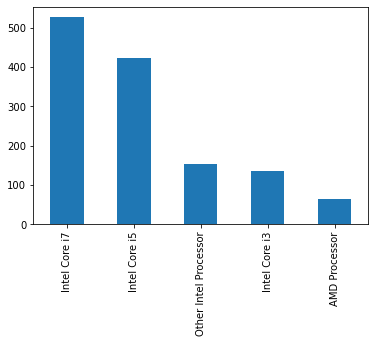

In [32]:
# this barplot shows the number of different processor types in the laptops
df['Cpu brand'].value_counts().plot(kind='bar')

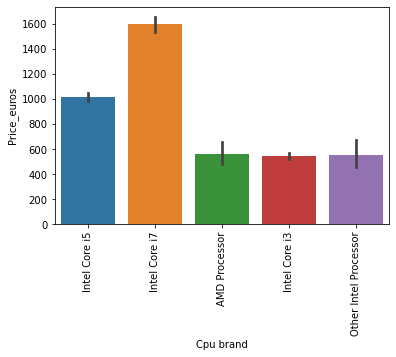

In [33]:
# this graph is between the processor and the price in euros
sns.barplot(x=df['Cpu brand'],y=df['Price_euros'])
plt.xticks(rotation='vertical')
plt.show()

In [34]:
df.drop(columns=['Cpu','Cpu Name'],inplace=True)

<AxesSubplot:>

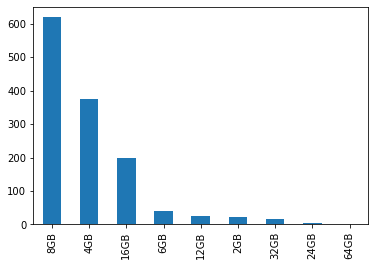

In [35]:
# the barplot shows the number of rams in different GBs in the data
df['Ram'].value_counts().plot(kind='bar')

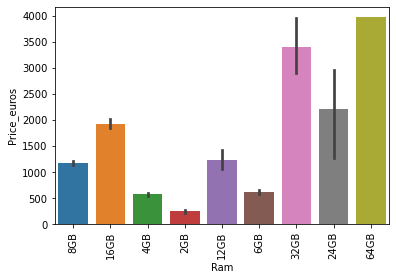

In [36]:
# this barplot shows the prices in euros of the Rams 
sns.barplot(x=df['Ram'],y=df['Price_euros'])
plt.xticks(rotation='vertical')
plt.show()

In [37]:
df['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
1TB SSD                           14
512GB SSD +  1TB HDD              14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
16GB SSD                           3
512GB SSD +  2TB HDD               3
512GB Flash Storage                2
256GB SSD +  256GB SSD             2
256GB SSD +  500GB HDD             2
1TB SSD +  1TB HDD                 2
128GB SSD +  2TB HDD               2
64GB Flash Storage +  1TB HDD      1
5

In [38]:
df['Ram'] = df['Ram'].str.replace('GB','')
df['Weight'] = df['Weight'].str.replace('kg','')
df['Ram'] = df['Ram'].astype('int32')
df['Weight'] = df['Weight'].astype('float32')

In [39]:
df.head()

,Company,Product,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,Ips,ppi,Cpu brand
0,Apple,MacBook Pro,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.983005,Intel Core i5
1,Apple,Macbook Air,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.677940,Intel Core i5
2,HP,250 G6,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,141.211998,Intel Core i5
3,Apple,MacBook Pro,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,220.534624,Intel Core i7
4,Apple,MacBook Pro,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,226.983005,Intel Core i5


In [40]:
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)

In [41]:
df["Memory"] = df["Memory"].str.replace('GB', '')

In [42]:
df["Memory"] = df["Memory"].str.replace('TB', '000')


In [43]:
new2 = df["Memory"].str.split("+", n = 1, expand = True)

In [44]:
df["first"]= new2[0]
df["first"]=df["first"].str.strip()

In [45]:
df["second"]= new2[1]

In [46]:
df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

In [47]:
df['first'] = df['first'].str.replace(r'\D', '')

<ipython-input-47-3a46925974fa>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['first'] = df['first'].str.replace(r'\D', '')


In [48]:
df["second"].fillna("0", inplace = True)


In [49]:
df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

In [50]:
df['second'] = df['second'].str.replace(r'\D', '')

<ipython-input-50-7103acb542b6>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['second'] = df['second'].str.replace(r'\D', '')


In [51]:
df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)

<AxesSubplot:>

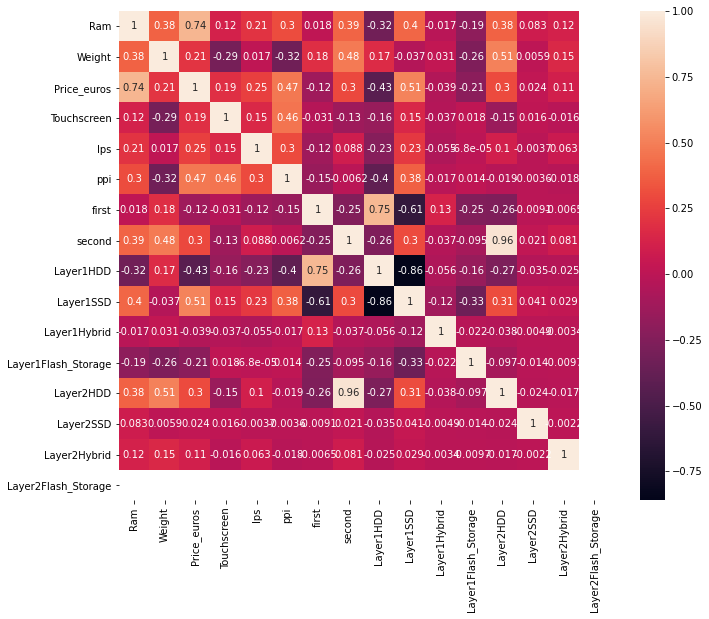

In [52]:
plt.figure(figsize=(11,9))
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:xlabel='Price_euros', ylabel='Ram'>

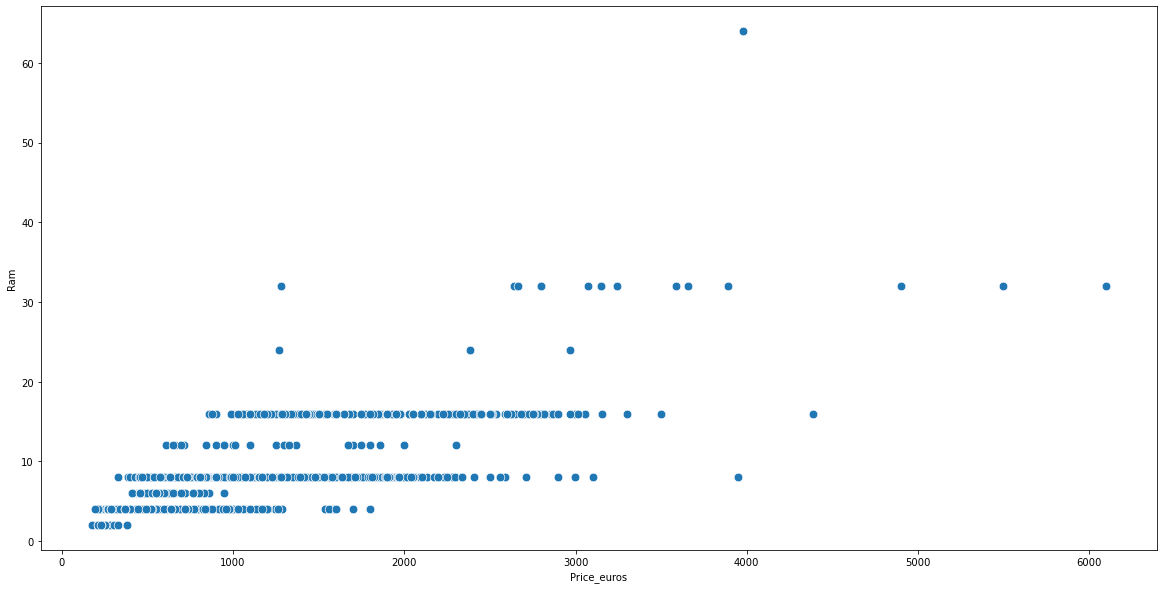

In [53]:
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.scatterplot(data=df, x="Price_euros", y="Ram", ax=ax, s=75)

<AxesSubplot:xlabel='Price_euros', ylabel='Layer1SSD'>

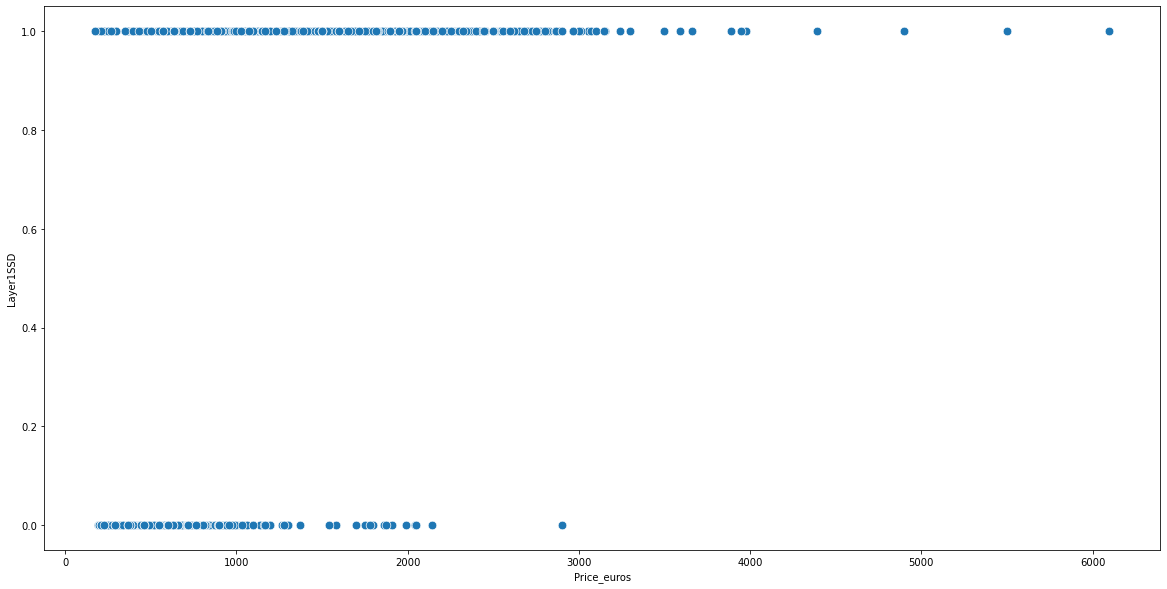

In [54]:
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.scatterplot(data=df, x="Price_euros", y="Layer1SSD", ax=ax, s=75)

In [55]:
X = df.drop(['Price_euros'],axis=1)
Y = df['Price_euros'].values
X = X.select_dtypes(exclude=['object'])

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

# Train Models

## LINEAR REGRESSION

In [57]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, Y)

LinearRegression()

In [58]:
from sklearn.metrics import mean_squared_error
# Let's see what is the prediction error of our model.


y_pred_lr = lin_reg.predict(X)
lin_mse = mean_squared_error(Y, y_pred_lr)
lin_rmse = np.sqrt(lin_mse)
print("Linear Regression MSE: ",lin_mse)
print("Linear Regression RMSE: ",lin_rmse)

Linear Regression MSE:  167580.86094436972
Linear Regression RMSE:  409.3664140404898


In [59]:
# Let's see how accurate is our model.
from sklearn import metrics
accuracy_lin = metrics.r2_score(Y, y_pred_lr)
print("Linear Regression r2: ",accuracy_lin)

Linear Regression r2:  0.6567644514526808


# DECISION TREE

In [60]:
from sklearn.tree import DecisionTreeRegressor

tree_reg=DecisionTreeRegressor()
tree_reg.fit(X,Y)

DecisionTreeRegressor()

In [61]:
y_pred_dt=tree_reg.predict(X)

dt_mse = mean_squared_error(Y, y_pred_dt)
dt_rmse = np.sqrt(dt_mse)
print("Decision Tree Regression MSE: ",dt_mse)
print("Decision Tree Regression RMSE: ",dt_rmse)

Decision Tree Regression MSE:  15464.560727788774
Decision Tree Regression RMSE:  124.35658698994908


In [62]:
accuracy_dt = metrics.r2_score(Y, y_pred_dt)
print("Decision Tree Regression r2: ",accuracy_dt)

Decision Tree Regression r2:  0.968325816238598


# RANDOM FOREST REGRESSION

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.4,random_state=42)

rf=RandomForestRegressor(n_estimators=100,random_state=42)

rf.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

In [76]:

y_pred_rf=rf.predict(x_test)

rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_rmse = np.sqrt(rf_mse)

print("Random Forest Regression MSE: ",rf_mse)
print("Random Forest Regression RMSE: ",rf_rmse)

Random Forest Regression MSE:  131243.74594193284
Random Forest Regression RMSE:  362.27578713175524


In [77]:
accuracy_rf=metrics.r2_score(y_test,y_pred_rf)

print("Random Forest Regression r2: ",accuracy_rf)

Random Forest Regression r2:  0.7400989461569603
